In this notebook, we're going to talk about how we can draw shapes onto an image, which will be helpful for visualizing the results of other algorithms we write.

# Important: Run this code cell each time you start a new session!

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install os
!pip install opencv-python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [2]:
!wget -Ncnp https://images.fineartamerica.com/images-medium-large-5/coloured-mri-scan-of-brain-in-sagittal-se-geoff-tompkinson.jpg

--2024-06-26 23:38:24--  https://images.fineartamerica.com/images-medium-large-5/coloured-mri-scan-of-brain-in-sagittal-se-geoff-tompkinson.jpg
Resolving images.fineartamerica.com (images.fineartamerica.com)... 18.238.217.23, 18.238.217.108, 18.238.217.74, ...
Connecting to images.fineartamerica.com (images.fineartamerica.com)|18.238.217.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278914 (272K) [image/jpeg]
Saving to: ‘coloured-mri-scan-of-brain-in-sagittal-se-geoff-tompkinson.jpg’

coloured-mri-scan-o 100%[===================>] 272.38K   550KB/s    in 0.5s    

2024-06-26 23:38:26 (550 KB/s) - ‘coloured-mri-scan-of-brain-in-sagittal-se-geoff-tompkinson.jpg’ saved [278914/278914]



In [3]:
import shutil
import os
orig_file = os.path.join('coloured-mri-scan-of-brain-in-sagittal-se-geoff-tompkinson.jpg')

os.rename(orig_file, 'color_mri.jpg')

# Image Coordinates and Array Indexes

Like the Cartesian system you might be used to in math or `matplotlib`, the x-axis is horizontal and the y-axis is vertical. However, `opencv` is different in that the origin starts at the top left, which means that increasing x goes from left to right and increasing y goes from top to bottom.

Meanwhile, `numpy` arrays are indexed such that the first dimension corresponds to the row (vertical direction) and the second dimensions corresponds to the column (horizontal direction).

If we were to have an image with a width of 300 and a height of 400, then these would be the coordinates of the image's corners in both systems:

| Corner | OpenCV coordinate | Numpy index |
|:--------------:|:-----------:|:-----------:|
| Top left | `(0, 0)` | `img[0, 0]` |
| Top right | `(299, 0)` | `img[0, 299]` |
| Bottom left | `(0, 399)` | `img[399, 0]` |
| Bottom right | `(299, 399)` | `img[399, 299]` |

We can confirm `opencv`'s system by displaying a blank image:

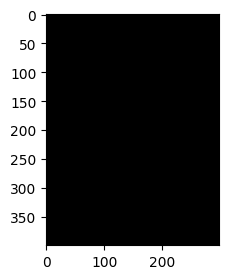

In [4]:
plt.figure(figsize=(3, 3))
plt.imshow(np.zeros((400,300,3), np.uint8))
plt.show()

The mismatch between `opencv`'s coordinate system and the indexing of `numpy` arrays can be confusing, so make sure you keep these facts in mind.

# Creating a Simple Shape Image

Now that we understand the coordinate system that `opencv` uses, let's create our own basic image and look at the underlying data to understand how images get translated to multidimensional arrays.

We will start by drawing a green rectangle on a black image. To do that, we will first create a simple helper function to initialize a blank `numpy` array with all zeroes and then use `cv2.rectangle()` to draw a rectangle.

In [5]:
# Create a function to make a blank image
def create_black_img():
    return np.zeros((300,300,3), np.uint8)

# Set the color and thickness of our drawings
green = (0, 255, 0)
thickness = 4

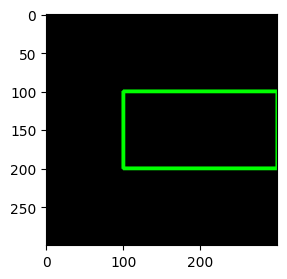

In [7]:
# Rectangle
pt1_x = 100 #@param {type:"slider", min:0, max:300, step:50}
pt1_y = 100 #@param {type:"slider", min:0, max:300, step:50}
pt2_x = 300 #@param {type:"slider", min:0, max:300, step:50}
pt2_y = 200 #@param {type:"slider", min:0, max:300, step:50}

img = create_black_img()
cv2.rectangle(img, pt1=(pt1_x, pt1_y), pt2=(pt2_x, pt2_y),
              color=green, thickness=thickness)

plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.show()

Let's look at what's happening underneath the hood by examining some of the values in our `img` array in a fixed example:

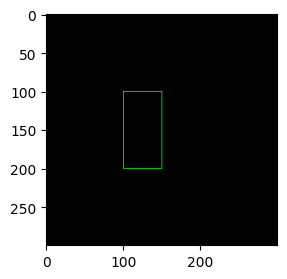

In [8]:
img = create_black_img()
cv2.rectangle(img, pt1=(100,100), pt2=(150, 200),
         color=green, thickness=1)

plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.show()

In [9]:
print(f'Some black pixels:')
for pt in [[0, 0], [299, 299], [135, 125]]:
    print(f'Coordinate {pt[1], pt[0]}: {img[pt[0], pt[1]]}')

Some black pixels:
Coordinate (0, 0): [0 0 0]
Coordinate (299, 299): [0 0 0]
Coordinate (125, 135): [0 0 0]


In [10]:
print(f'Some green pixels:')
for pt in [[100, 100], [200, 100], [100, 150], [200, 150], [100, 125]]:
    print(f'Coordinate {pt[1], pt[0]}: {img[pt[0], pt[1]]}')

Some green pixels:
Coordinate (100, 100): [  0 255   0]
Coordinate (100, 200): [  0 255   0]
Coordinate (150, 100): [  0 255   0]
Coordinate (150, 200): [  0 255   0]
Coordinate (125, 100): [  0 255   0]


Observe that that the color of all the pixels along the rectangle's edges have been set to green. Meanwhile, the other pixels have been kept black. In the end, all the `cv2.rectangle()` function is doing is a series of assignment statements that is setting the value of the image array at certain indices to the color that we have specified:

```
compute list of pixels for the rectangle
for every point in the list:
    set its color to green
```

# Other Shapes and Drawing Tips

Now that we have a better sense of how drawing manipulates our image data, let's look at other shapes we can draw:

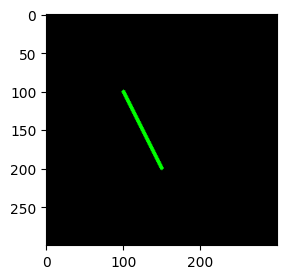

In [11]:
# Line
pt1_x = 100 #@param {type:"slider", min:0, max:300, step:50}
pt1_y = 100 #@param {type:"slider", min:0, max:300, step:50}
pt2_x = 150 #@param {type:"slider", min:0, max:300, step:50}
pt2_y = 200 #@param {type:"slider", min:0, max:300, step:50}

img = create_black_img()
cv2.line(img, pt1=(pt1_x,pt1_y), pt2=(pt2_x, pt2_y),
         color=green, thickness=thickness)

plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.show()

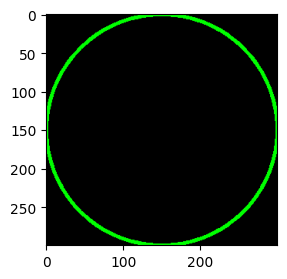

In [13]:
# Circle
center_x = 150 #@param {type:"slider", min:0, max:300, step:50}
center_y = 150 #@param {type:"slider", min:0, max:300, step:50}
radius = 150 #@param {type:"slider", min:0, max:150, step:50}

img = create_black_img()
cv2.circle(img, center=(center_x,center_y), radius=radius,
           color=green, thickness=thickness)

plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.show()

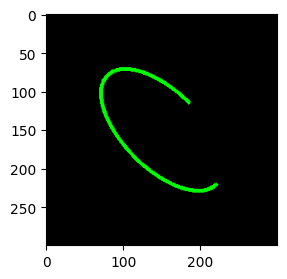

In [17]:
# Ellipse
center_x = 150 #@param {type:"slider", min:0, max:300, step:50}
center_y = 150 #@param {type:"slider", min:0, max:300, step:50}
major_axis = 100 #@param {type:"slider", min:0, max:150, step:50}
minor_axis = 50 #@param {type:"slider", min:0, max:150, step:50}
angle = 45 #@param {type:"slider", min:0, max:360, step:45}
startAngle = 0 #@param {type:"slider", min:0, max:360, step:45}
endAngle = 270 #@param {type:"slider", min:0, max:360, step:45}

img = create_black_img()
cv2.ellipse(img, center=(center_x,center_y),
            axes=(major_axis,minor_axis), angle=angle,
            startAngle=startAngle, endAngle=endAngle,
            color=green, thickness=thickness)

plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.show()

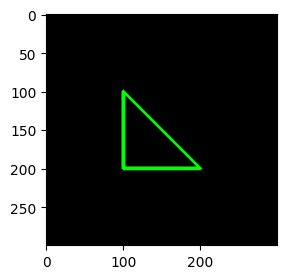

In [19]:
# Polygon (a triangle in this example)
pt1_x = 100 #@param {type:"slider", min:0, max:300, step:50}
pt1_y = 100 #@param {type:"slider", min:0, max:300, step:50}
pt2_x = 100 #@param {type:"slider", min:0, max:300, step:50}
pt2_y = 200 #@param {type:"slider", min:0, max:300, step:50}
pt3_x = 200 #@param {type:"slider", min:0, max:300, step:50}
pt3_y = 200 #@param {type:"slider", min:0, max:300, step:50}

pts = np.array([[pt1_x,pt1_y],
                [pt2_x,pt2_y],
                [pt3_x,pt3_y]], np.int32)
pts = [pts.reshape((-1,1,2))]

img = create_black_img()
cv2.polylines(img, pts=pts, isClosed=True,
              color=green, thickness=thickness)

plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.show()

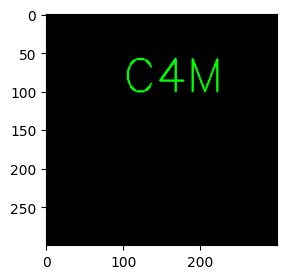

In [20]:
# Text
origin_x = 100 #@param {type:"slider", min:0, max:300, step:50}
origin_y = 100 #@param {type:"slider", min:0, max:300, step:50}
fontScale = 2 #@param {type:"slider", min:0, max:5, step:1}

img = create_black_img()
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, text='C4M', org=(origin_x,origin_y),
            fontFace=font, fontScale=fontScale,
            color=green, thickness=2)

plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.show()

For all of these examples, we set thickness to a positive integer value. If you find yourself in a situation when you want to fill in the entire shape (excluding lines and text), you can set the thickness to `-1`:

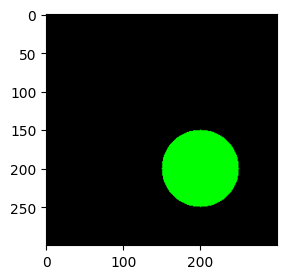

In [21]:
# Create a filled circle
img = create_black_img()
cv2.circle(img, center=(200,200), radius=50,
           color=green, thickness=-1)

plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.show()

Although we've drawn these shapes one at a time, you can draw as many shapes as you want on a single image. For any given pixel where two shapes overlap, the latest shape will always take precedence.

Visually, you can imagine that we are adding new brush strokes on top of a painting. Programmatically, we are simply updating the elements of our image array just as an array would be updated in any other Python script.

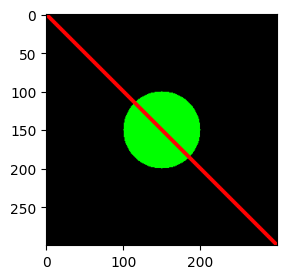

In [22]:
red = (255, 0, 0)

# Draw a red circle on top of a green line
img = create_black_img()
cv2.circle(img, center=(150,150), radius=50,
           color=green, thickness=-1)
cv2.line(img, pt1=(0,0), pt2=(300,300),
         color=red, thickness=thickness)

plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.show()

# Why Are Shapes Useful?

Adding shapes onto images is not going to be useful for analyzing images with computer vision or machine learning. However, like working with `matplotlib`, learning these functions can make it much easier for you to visualize the results of your analyses.

For example, imagine that we've written an algorithm that identifies an anomaly in an MRI. We can draw an ellipse around the anomaly so that we can visually determine if the algorithm's output makes sense:

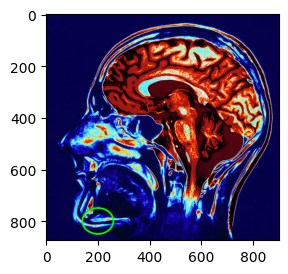

In [23]:
# Load the image and convert to RGB
img = cv2.imread('color_mri.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Add the ellipse on top of the image
cv2.ellipse(img, center=(200,800),
            axes=(60,50), angle=0,
            startAngle=0, endAngle=360,
            color=green, thickness=5)

# Show the overall image
plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.show()